In [128]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [129]:
from collections import defaultdict

In [130]:
df = pd.read_csv("C://Users//ibipul//codes//datasets//Zillow_data//train_2016_v2.csv")

In [131]:
dfp = pd.read_csv("C://Users//ibipul//codes//datasets//Zillow_data/properties_2016.csv", low_memory = False)

In [132]:
df1 = pd.merge(df,dfp, on='parcelid')

In [133]:
dfp.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,...,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN


In [134]:
desirability_attributes = []
key = ['parcelid']
count_attributes = ['bedroomcnt','bathroomcnt']
house_area_attributes = ['calculatedfinishedsquarefeet','lotsizesquarefeet']
oldness_attribute = ['yearbuilt']
monetary_attribute = ['structuretaxvaluedollarcnt']
desirability_attributes = count_attributes + house_area_attributes + oldness_attribute + monetary_attribute
all_attributes = key + desirability_attributes

In [135]:
dfr = dfp[all_attributes]

In [136]:
dfr[desirability_attributes].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
bedroomcnt,2973767.0,3.088949,1.275859,0.0,2.0,3.0,4.0,20.0
bathroomcnt,2973755.0,2.209143,1.077754,0.0,2.0,2.0,3.0,20.0
calculatedfinishedsquarefeet,2929652.0,1827.162124,1819.780469,1.0,1213.0,1572.0,2136.0,952576.0
lotsizesquarefeet,2709118.0,22822.805528,337592.366408,100.0,5688.0,7000.0,9898.0,328263808.0
yearbuilt,2925289.0,1964.261641,23.441319,1801.0,1950.0,1963.0,1981.0,2015.0
structuretaxvaluedollarcnt,2930235.0,170883.577166,402068.342015,1.0,74800.0,122590.0,196889.0,251486000.0


In [137]:
missing_df = dfr.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df.loc[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by='missing_count')

In [138]:
missing_df

,column_name,missing_count
1,bedroomcnt,11450
2,bathroomcnt,11462
6,structuretaxvaluedollarcnt,54982
3,calculatedfinishedsquarefeet,55565
5,yearbuilt,59928
4,lotsizesquarefeet,276099


In [139]:
dfr1 = dfr.dropna(axis=0, how='any')

In [140]:
dfr1[all_attributes].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
parcelid,2688057.0,1.280385e+07,2.413644e+06,10711725.0,11578096.0,12425993.0,13934696.0,163275886.0
bedroomcnt,2688057.0,3.229671e+00,1.181220e+00,0.0,3.0,3.0,4.0,20.0
bathroomcnt,2688057.0,2.275778e+00,1.041868e+00,0.0,2.0,2.0,3.0,20.0
calculatedfinishedsquarefeet,2688057.0,1.861594e+03,1.625765e+03,1.0,1238.0,1604.0,2188.0,952576.0
lotsizesquarefeet,2688057.0,2.258375e+04,3.377145e+05,104.0,5694.0,7000.0,9873.0,328263808.0
yearbuilt,2688057.0,1.962227e+03,2.285559e+01,1801.0,1949.0,1961.0,1979.0,2015.0
structuretaxvaluedollarcnt,2688057.0,1.705272e+05,2.814063e+05,1.0,75180.0,122831.0,197150.0,109192169.0


In [141]:
sum((dfr1['calculatedfinishedsquarefeet'] <20)*1)

28

In [142]:
# For other columns imputations don't make sense, as there are a range of values for which we might have junk numbers
# Like some inspection showed there are cases where rooms are listed to have calculated finished sq foot of 1, or 
# structural tax of of 1 dollar. Often lot size, structural tax have ridiculously high values.
# So I intend to drop bottom 5%ile and top 95%ile data to get rid of outliers rather than taking up
# a hackneyed imputation
count_cols = ['bedroomcnt','bathroomcnt']
filter_by_percentile_cols = ['calculatedfinishedsquarefeet','lotsizesquarefeet', 'structuretaxvaluedollarcnt'] + count_cols


In [143]:
removal_band = 5
quanitile_filter_dict = defaultdict()
for col in filter_by_percentile_cols:
    quanitile_filter_dict[col] = (np.percentile(dfr1[col],removal_band),np.percentile(dfr1[col],100 - removal_band))

In [144]:
dfr2 = dfr1.copy()
for key in quanitile_filter_dict.keys():
    print('Column: ', key,' Drop below: ', quanitile_filter_dict[key][0],' Drop Above: ', quanitile_filter_dict[key][1])
    dfr2 = dfr2[dfr2[key] > quanitile_filter_dict[key][0]]
    dfr2 = dfr2[dfr2[key] < quanitile_filter_dict[key][1]]


Column:  calculatedfinishedsquarefeet  Drop below:  860.0  Drop Above:  3583.0
Column:  lotsizesquarefeet  Drop below:  3200.0  Drop Above:  75658.0
Column:  structuretaxvaluedollarcnt  Drop below:  31392.0  Drop Above:  432375.2
Column:  bedroomcnt  Drop below:  2.0  Drop Above:  5.0
Column:  bathroomcnt  Drop below:  1.0  Drop Above:  4.0


In [145]:
missing_df = dfr2.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df.loc[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by='missing_count')
missing_df

,column_name,missing_count


In [146]:
dfr2[all_attributes].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
parcelid,1360701.0,1.300694e+07,2.554090e+06,10711725.0,11556686.0,12696274.0,14077908.0,163275886.0
bedroomcnt,1360701.0,3.422096e+00,4.938938e-01,3.0,3.0,3.0,4.0,4.0
bathroomcnt,1360701.0,2.323959e+00,4.634935e-01,1.5,2.0,2.0,3.0,3.5
calculatedfinishedsquarefeet,1360701.0,1.806830e+03,5.057303e+02,861.0,1420.0,1703.0,2108.0,3582.0
lotsizesquarefeet,1360701.0,8.887701e+03,7.449588e+03,3201.0,5985.0,7000.0,8650.0,75642.0
yearbuilt,1360701.0,1.964505e+03,1.952145e+01,1810.0,1954.0,1962.0,1978.0,2015.0
structuretaxvaluedollarcnt,1360701.0,1.469807e+05,8.090506e+04,31393.0,86000.0,129658.0,190205.0,432372.0


In [147]:
# Desirablity:
# More Bedrooms & bath rooms more desirable
# More finished square footing and more lot area means more desirable
# Buildings built later implies newer buildings, hence more desirable
# Lower tax value means higher desirability

In [148]:
from scipy import stats

In [167]:
ascending_desirability_columns = ['bedroomcnt','bathroomcnt','calculatedfinishedsquarefeet','lotsizesquarefeet', 'yearbuilt']
descending_desirability_columns = ['structuretaxvaluedollarcnt']
quantile_score_columns = ascending_desirability_columns + descending_desirability_columns
parcel_ids = pd.DataFrame(dfr2['parcelid'])
#all_columns= quantile_score_columns + ['parcelid']

In [168]:
parcel_ids.shape

(1360701, 1)

In [173]:
#parcel_id_list = pd.DataFrame(dfr2['parcelid'])
# structuretaxvaluedollarcnt_score = pd.DataFrame(1 - (stats.rankdata(dfr2['structuretaxvaluedollarcnt'], 
#                                                                     "average")/len(dfr2['structuretaxvaluedollarcnt'])))
# bedroomcnt_score = pd.DataFrame(stats.rankdata(dfr2['bedroomcnt'], "average")/len(dfr2['bedroomcnt']))
# bathroomcnt_score = pd.DataFrame(stats.rankdata(dfr2['bathroomcnt'], "average")/len(dfr2['bathroomcnt']))
# calculatedfinishedsquarefeet_score = pd.DataFrame(stats.rankdata(dfr2['calculatedfinishedsquarefeet'],
#                                                                  "average")/len(dfr2['calculatedfinishedsquarefeet']))
# lotsizesquarefeet_score = pd.DataFrame(stats.rankdata(dfr2['lotsizesquarefeet'], "average")/len(dfr2['lotsizesquarefeet']))
# yearbuilt_score = pd.DataFrame(stats.rankdata(dfr2['yearbuilt'], "average")/len(dfr2['yearbuilt']))

quantile_score_frame = pd.DataFrame({'structuretaxvaluedollarcnt_score': 1 - (stats.rankdata(dfr2['structuretaxvaluedollarcnt'], 
                                                                     "average")/len(dfr2['structuretaxvaluedollarcnt']))})
score_names = []
for col in ascending_desirability_columns:
    quantile_score_frame[col+'_score'] = stats.rankdata(dfr2[col], "average")/len(dfr2[col])
    score_names += [col + '_score']

quantile_score_frame['parcelid'] = parcel_ids.iloc[:,0].values

In [174]:
all_score_columns = score_names + ['parcelid']

In [175]:
missing_df = quantile_score_frame.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df.loc[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by='missing_count')
missing_df

,column_name,missing_count


In [176]:
bathroomcnt_score.shape

(1360701, 1)

In [178]:
quantile_score_frame[score_names].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
bedroomcnt_score,1360701.0,0.5,0.246947,2.889525e-01,0.288953,0.288953,0.788953,0.788953
bathroomcnt_score,1360701.0,0.5,0.248375,6.786575e-03,0.323210,0.323210,0.852832,0.996159
calculatedfinishedsquarefeet_score,1360701.0,0.5,0.288675,1.837288e-06,0.250549,0.499819,0.749928,0.999997
lotsizesquarefeet_score,1360701.0,0.5,0.288672,1.139119e-05,0.249859,0.497400,0.750004,1.000000
yearbuilt_score,1360701.0,0.5,0.288611,7.349153e-07,0.262850,0.492928,0.757544,0.999989


In [179]:
quantile_score_frame[all_score_columns].head(5)

,bedroomcnt_score,bathroomcnt_score,calculatedfinishedsquarefeet_score,lotsizesquarefeet_score,yearbuilt_score,parcelid
0,0.288953,0.323210,0.735119,0.395742,0.041892,11585547
1,0.788953,0.323210,0.656840,0.164248,0.375079,11759947
2,0.288953,0.852832,0.775931,0.959389,0.984010,12606547
3,0.288953,0.323210,0.148551,0.075224,0.171228,12757147
4,0.288953,0.323210,0.087150,0.176444,0.191573,12757947


In [181]:
X = quantile_score_frame[score_names]
missing_df = X.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df.loc[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by='missing_count')
missing_df          

,column_name,missing_count


In [182]:
# Generating combination coifficients using PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [183]:
combination_coefficients = pd.DataFrame(pca.components_[0]) 
# Eigen Vector of PC1, Linear combination but with PC1 components 1xn form
combination_coefficients

,0
0,0.315227
1,0.497906
2,0.626557
3,0.228665
4,0.455916


In [184]:
# def linear_combination(row,coeffs = combination_coefficients):
#     score = 0
#     for i in range(len(coeffs)):
#         score += row[i]*coeffs[i]
#     return score
#quantile_score_frame =quantile_score_frame.drop('tentative_score',1)
tentative_score = np.dot(quantile_score_frame[score_names], combination_coefficients)

In [186]:
quantile_score_frame['tentative_score'] = tentative_score

In [254]:
#quantile_score_frame['tentative_score'] = pd.DataFrame(tentative_score)

In [187]:

missing_df = quantile_score_frame.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df.loc[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by='missing_count')
missing_df

,column_name,missing_count


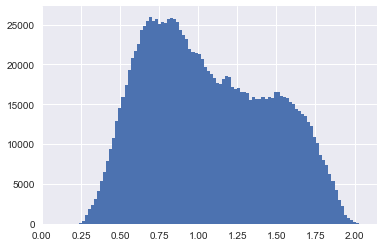

In [192]:
#plt.xlim(xmin=-.5, xmax = 2)
#plt.ylim(ymin=0,ymax=2000000)
x=plt.hist(quantile_score_frame['tentative_score'],bins=100)

In [189]:
quantile_score_frame.head()

,structuretaxvaluedollarcnt_score,bedroomcnt_score,bathroomcnt_score,calculatedfinishedsquarefeet_score,lotsizesquarefeet_score,yearbuilt_score,parcelid,tentative_score
0,0.203687,0.288953,0.323210,0.735119,0.395742,0.041892,11585547,0.822199
1,0.535923,0.788953,0.323210,0.656840,0.164248,0.375079,11759947,1.029738
2,0.019898,0.288953,0.852832,0.775931,0.959389,0.984010,12606547,1.669886
3,0.805760,0.288953,0.323210,0.148551,0.075224,0.171228,12757147,0.440356
4,0.573477,0.288953,0.323210,0.087150,0.176444,0.191573,12757947,0.434306


In [27]:
df['relative_error']=100*(np.exp(df['logerror']) - 1)
df['sq_rel_error']=df['relative_error'].apply(lambda x: x**2)
df['month'] = df['transactiondate'].apply(lambda x:  int(x.split('-')[1]))

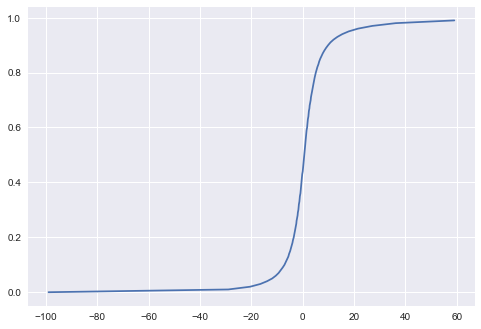

In [5]:
plt.plot(df['relative_error'].quantile([i/100 for i in range(0,100, 1)]),[i/100 for i in range(0,100, 1)])

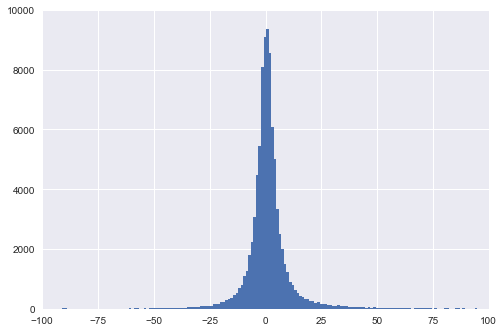

In [6]:
plt.xlim(xmin=-100, xmax = +100)
plt.ylim(ymin=0,ymax=10000)
x=plt.hist(df['relative_error'],bins=10000)

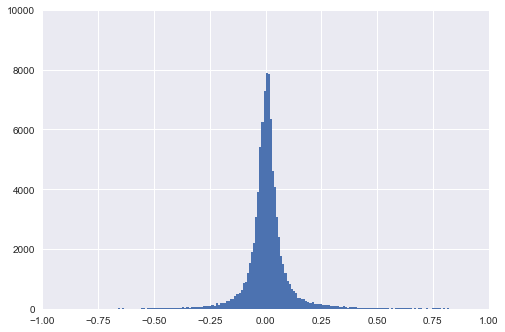

In [7]:
plt.xlim(xmin=-1, xmax = +1)
plt.ylim(ymin=0,ymax=10000)
x=plt.hist(df['logerror'],bins=1000)

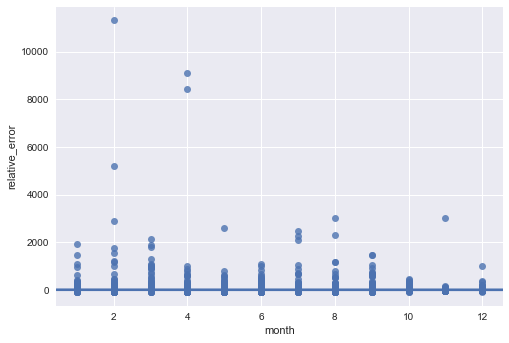

In [8]:
sns.regplot(x='month', y='relative_error', data=df)

In [37]:
grouped_means_error = df.groupby(['month'])['relative_error'].mean()/100
grouped_means_sqerror = df.groupby(['month'])['sq_rel_error'].mean()/10000

In [38]:
temp = pd.DataFrame(data = {'month':df.month.unique(), 'sum_rel_err':grouped_means, 'sum_rel_sq_error':grouped_means_sqerror})

In [39]:
temp.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
month,12.0,6.500000,3.605551,1.000000,3.750000,6.500000,9.250000,12.000000
sum_rel_err,12.0,3.422602,1.192347,2.051949,2.888415,3.392092,3.634139,6.701986
sum_rel_sq_error,12.0,0.526148,0.842839,0.034417,0.111446,0.185107,0.343913,2.770870


In [8]:
df1.head()

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,11016594,0.0276,2016-01-01,1.0,NaN,NaN,2.0,3.0,NaN,4.0,...,NaN,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,NaN,6.037107e+13
1,14366692,-0.1684,2016-01-01,NaN,NaN,NaN,3.5,4.0,NaN,NaN,...,NaN,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN,NaN
2,12098116,-0.0040,2016-01-01,1.0,NaN,NaN,3.0,2.0,NaN,4.0,...,NaN,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,NaN,6.037464e+13
3,12643413,0.0218,2016-01-02,1.0,NaN,NaN,2.0,2.0,NaN,4.0,...,NaN,NaN,171518.0,244880.0,2015.0,73362.0,3048.74,NaN,NaN,6.037296e+13
4,14432541,-0.0050,2016-01-02,NaN,NaN,NaN,2.5,4.0,NaN,NaN,...,2.0,NaN,169574.0,434551.0,2015.0,264977.0,5488.96,NaN,NaN,6.059042e+13
